In [1]:
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import matplotlib.pyplot as plt

In [2]:
# Carregar o arquivo CSV


maxDerivada


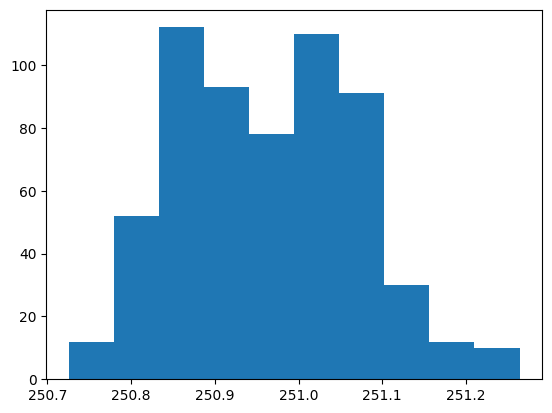

[[1.2646711021523511, 1.543271674525896], [0.264581412598458, 0.3228673439080923]]
600


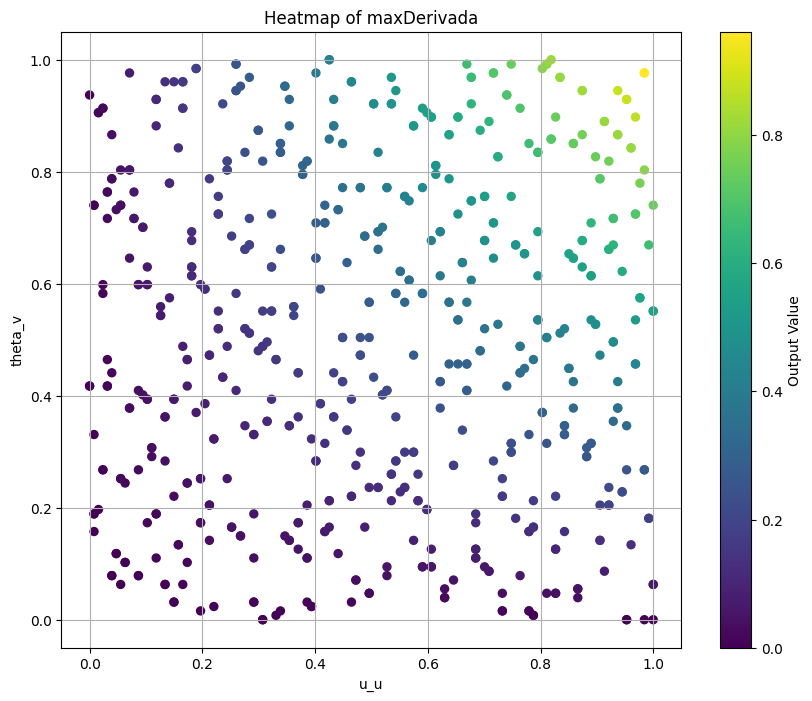

               ST   ST_conf
u_u      0.533862  0.200829
theta_v  0.558411  0.201640
               S1   S1_conf
u_u      0.494897  0.178856
theta_v  0.312731  0.167388
                      S2   S2_conf
[u_u, theta_v]  0.179165  0.454134
maxAPD


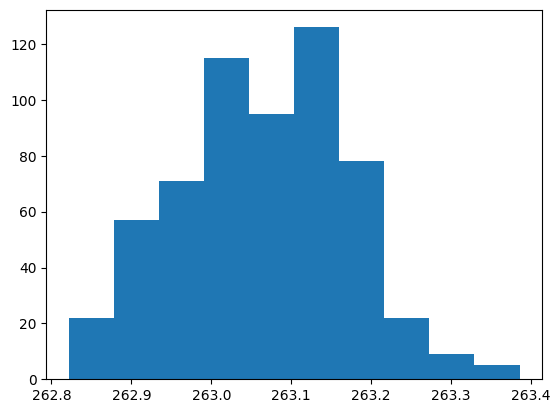

[[1.2646711021523511, 1.543271674525896], [0.264581412598458, 0.3228673439080923]]
600


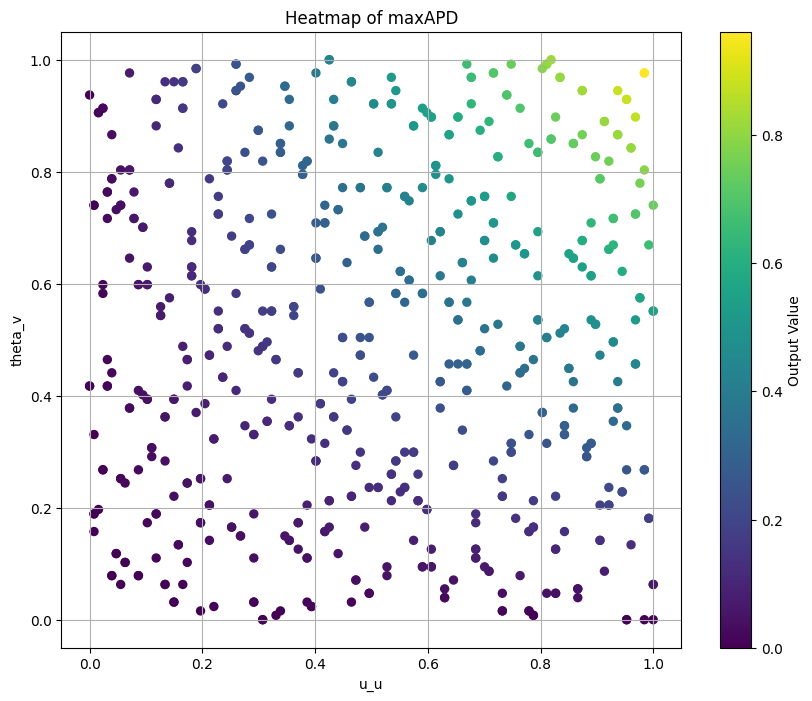

               ST  ST_conf
u_u      0.533862  0.18012
theta_v  0.558411  0.17910
               S1   S1_conf
u_u      0.494897  0.178217
theta_v  0.312731  0.177356
                      S2   S2_conf
[u_u, theta_v]  0.179165  0.361608
minAPD


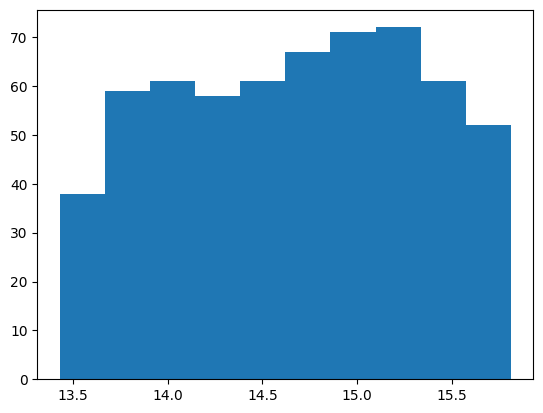

[[1.2646711021523511, 1.543271674525896], [0.264581412598458, 0.3228673439080923]]
600


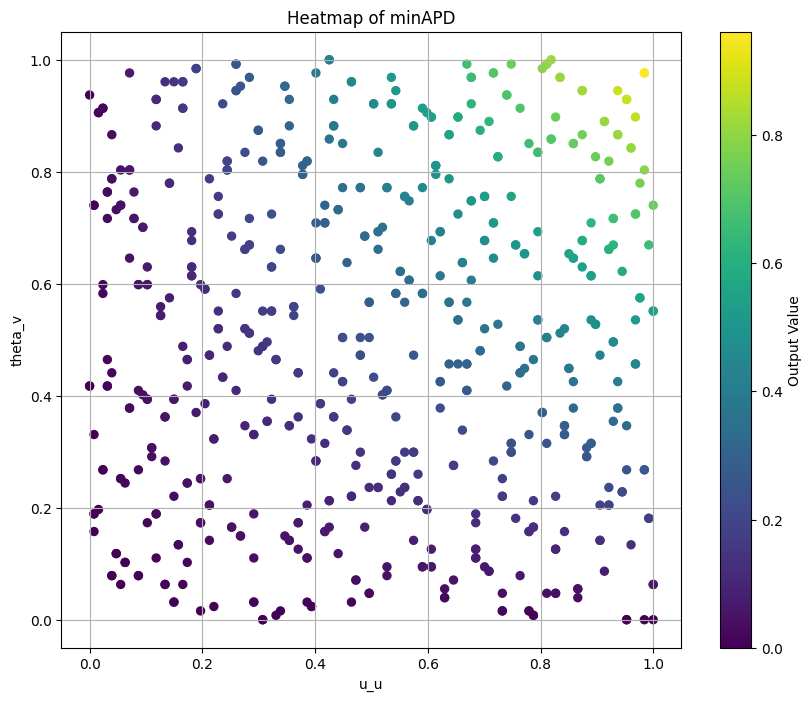

               ST   ST_conf
u_u      0.533862  0.196630
theta_v  0.558411  0.197342
               S1   S1_conf
u_u      0.494897  0.177417
theta_v  0.312731  0.177772
                      S2   S2_conf
[u_u, theta_v]  0.179165  0.393874


In [19]:
import pandas as pd
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import matplotlib.pyplot as plt

file_path = '100_42_result_latin_hyper_cube.csv'  # Altere para o caminho correto do arquivo
df = pd.read_csv(file_path)
param_names = df.columns[:2].tolist()
param_values = df[param_names].values
x = np.linspace(param_values[:, 0].min(), param_values[:, 0].max(), 100)
y = np.linspace(param_values[:, 1].min(), param_values[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
def min_max_scaling(array):
    min_val = np.min(array, axis=0)
    max_val = np.max(array, axis=0)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array



for i in range(2,5):


    output_name = df.columns[i]  

    if(True):
        print(output_name)
        output_values = df[output_name].values
        
        plt.hist(output_values)
        plt.show()


        param_values=min_max_scaling(param_values)



       
        output_values=min_max_scaling(output_values)
        output_values=param_values[:, 0]*param_values[:, 1]

        bounds = [[df[col].min(), df[col].max()] for col in param_names]
        print(bounds)
        problem = {
            'num_vars': len(param_names),
            'names': param_names,
            'bounds': bounds

        }
        print(len(output_values))
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(param_values[:, 0], param_values[:, 1], c=output_values, cmap='viridis', s=33)
        plt.colorbar(scatter, label='Output Value')
        plt.title(f'Heatmap of {output_name}')
        plt.xlabel(param_names[0])
        plt.ylabel(param_names[1])
        plt.grid(True)
        plt.show()
        sobol_indices = sobol.analyze(problem, output_values, calc_second_order=True, print_to_console=True)





In [4]:
import numpy as np
from SALib.analyze import sobol
from SALib.sample import sobol_sequence

# Define the model function
def model(x):
    # Example model: a simple quadratic function
    return x[:, 0]

# Define the problem: the number of inputs and their bounds
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-1.0, 1.0],
               [-1.0, 1.0],
               [-1.0, 1.0]]
}

# Use Sobol sequence to generate samples, or use your given sample set
num_samples = 1000  # Define number of samples
sobol_sample_indices = sobol_sequence.sample(num_samples, problem['num_vars'])

# If you have a given sample set, replace sobol_sample_indices with your sample set
# Example: sobol_sample_indices = your_sample_array

# Evaluate the model on the sample points
Y = model(sobol_sample_indices)

# Perform Sobol sensitivity analysis
sobol_indices = sobol.analyze()

# Print the results
print("First-order Sobol indices:", sobol_indices['S1'])
print("Second-order Sobol indices:", sobol_indices['S2'])
print("Total-order Sobol indices:", sobol_indices['ST'])

TypeError: analyze() missing 2 required positional arguments: 'problem' and 'Y'

## SOBOL maxDerivada

In [ ]:



Si.plot()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['S1'], color='blue')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxDerivada - S1 - Total = {sum(Si['S1'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

print(Si['S2'])

print(Si['ST'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['ST'], color='red')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxDerivada - ST - Total = {sum(Si['ST'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

NameError: name 'Si' is not defined

## SOBOL maxAPD

In [ ]:
problem_amostragem = {
    'num_vars': 2,
    'names': ["A","B"],
    'bounds': [[0,1],[0,1]]
}



np.random.seed(10)   # Sampling using latin hypercube
param_values_a = saltelli.sample(problem_amostragem, 10)


np.random.seed(32)   # Sampling using latin hypercube
param_values_b = saltelli.sample(problem_amostragem, 10)

print(param_values_a-param_values_b)



[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


/tmp/ipykernel_2027939/2625768096.py:10: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values_a = saltelli.sample(problem_amostragem, 10)
/tmp/ipykernel_2027939/2625768096.py:14: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values_b = saltelli.sample(problem_amostragem, 10)


## SOBOL minAPD

In [ ]:
Si = sobol.analyze(
    problem, minAPD, calc_second_order=True, conf_level=0.95, print_to_console=True
)

Si.plot()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['S1'], color='blue')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol minAPD - S1 - Total = {sum(Si['S1'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

print(Si['S2'])

print(Si['ST'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['ST'], color='red')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol minAPD - ST - Total = {sum(Si['ST'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

## SOBOL maxDerivadaCV

In [ ]:
Si = sobol.analyze(
    problem, maxDerivadaCV, calc_second_order=True, conf_level=0.95, print_to_console=True
)

Si.plot()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['S1'], color='blue')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxDerivadaCV - S1 - Total = {sum(Si['S1'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

print(Si['S2'])

print(Si['ST'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['ST'], color='red')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxDerivadaCV - ST - Total = {sum(Si['ST'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

## SOBOL maxCV

In [ ]:
Si = sobol.analyze(
    problem, maxCV, calc_second_order=True, conf_level=0.95, print_to_console=True
)

Si.plot()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['S1'], color='blue')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxCV - S1 - Total = {sum(Si['S1'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

print(Si['S2'])

print(Si['ST'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['ST'], color='red')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol maxCV - ST - Total = {sum(Si['ST'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

## SOBOL minCV

In [ ]:
Si = sobol.analyze(
    problem, minCV, calc_second_order=True, conf_level=0.95, print_to_console=True
)

Si.plot()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['S1'], color='blue')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol minCV - S1 - Total = {sum(Si['S1'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

print(Si['S2'])

print(Si['ST'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura (opcional)

plt.bar(nomes_variaveis, Si['ST'], color='red')  # Criando o gráfico de barras

plt.xlabel('Variáveis')  # Definindo o rótulo do eixo x
plt.ylabel('Valores')    # Definindo o rótulo do eixo y
plt.title(f"Sobol minCV - ST - Total = {sum(Si['ST'])}")  # Definindo o título do gráfico

# Definindo as legendas do eixo x com base no vetor 'variaveis'
plt.xticks(nomes_variaveis)

plt.tight_layout()  # Ajusta o layout para evitar cortes

plt.show()  # Mostra o gráfico

/home/lucas/anaconda3/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


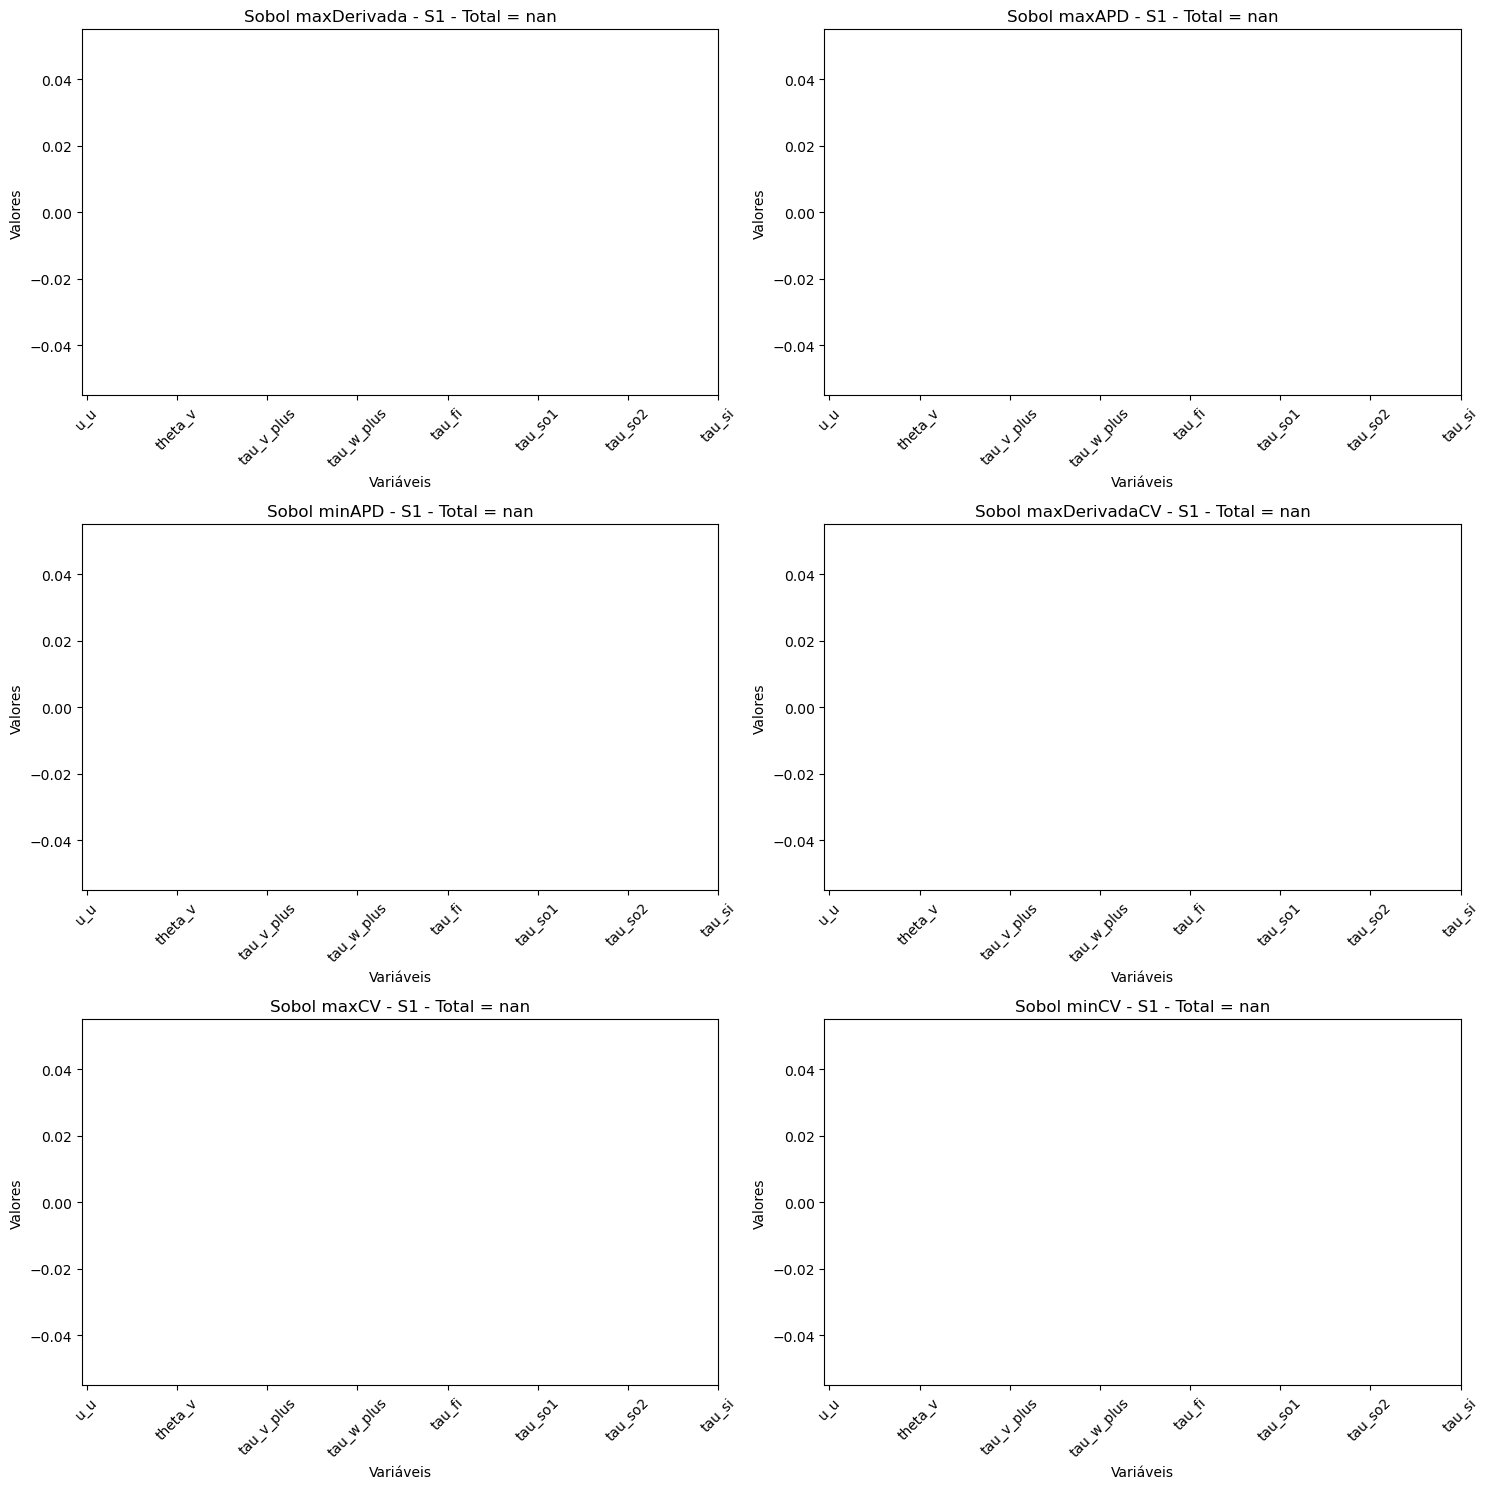

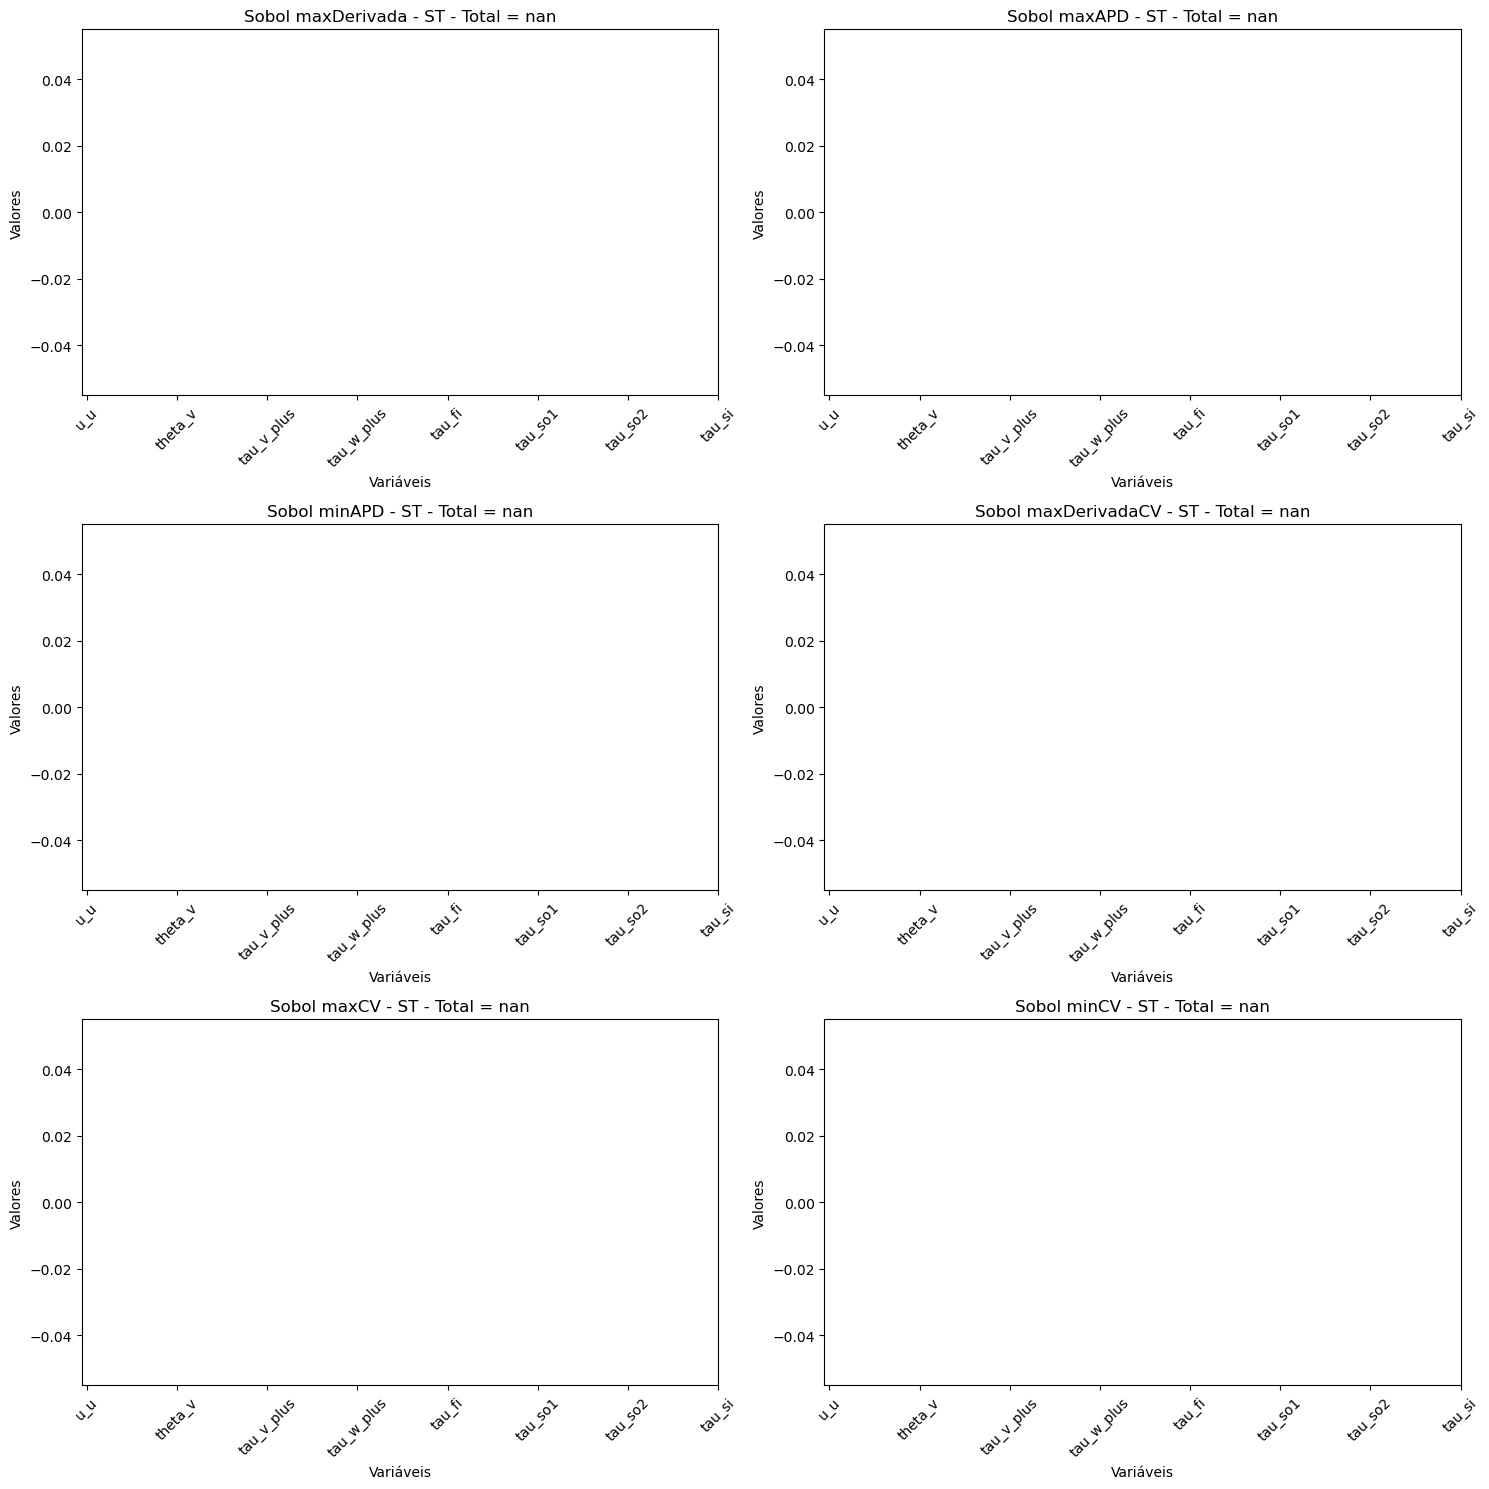

In [ ]:
import matplotlib.pyplot as plt
from SALib.analyze import sobol
import numpy as np

variaveis = ['maxDerivada', 'maxAPD', 'minAPD', 'maxDerivadaCV', 'maxCV', 'minCV']
resultados = []  # Lista para armazenar os resultados de cada análise

# Loop para gerar as análises e armazenar os resultados
for variavel in variaveis:
    Y = data_columns[variavel]
    # Execute a análise de Sobol
    Si = sobol.analyze(problem, Y, calc_second_order=True, conf_level=0.95)
    resultados.append(Si)

# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos

# Plotando cada gráfico em um subplot diferente
for i, resultado in enumerate(resultados):
    axs[i].bar(nomes_variaveis, resultado['S1'], color='blue')  # Gráfico de barras para S1
    axs[i].set_xlabel('Variáveis')
    axs[i].set_ylabel('Valores')
    axs[i].set_title(f"Sobol {variaveis[i]} - S1 - Total = {sum(resultado['S1'])}")
    axs[i].set_xticks(nomes_variaveis)
    axs[i].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x, se necessário

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico

# Criando a figura com 6 subplots lado a lado
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Ajuste o tamanho da figura conforme necessário
axs = axs.flatten()  # Facilita o acesso aos eixos

# Plotando cada gráfico em um subplot diferente
for i, resultado in enumerate(resultados):
    axs[i].bar(nomes_variaveis, resultado['ST'], color='red')  # Gráfico de barras para S1
    axs[i].set_xlabel('Variáveis')
    axs[i].set_ylabel('Valores')
    axs[i].set_title(f"Sobol {variaveis[i]} - ST - Total = {sum(resultado['ST'])}")
    axs[i].set_xticks(nomes_variaveis)
    axs[i].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x, se necessário

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()  # Mostra o gráfico
